In [4]:
# ----- IMPORTACIÓN DE LIBRERÍAS -----
# Se importan las librerias necesarias para proceder con la obtención de datos de Google Trends

import pandas as pd
from pytrends.request import TrendReq
import time

print("Librerías importadas correctamente.")

Librerías importadas correctamente.


# Importación de Librerias
Esta primera celda, nos permite cargar las librerias fundamentales para el proyecto que estamos realizando
'pandas:' Esta es la libreria estandar en Python para la manipulación y análisis de los datos (DataFrames)
TrendReq de pytrends: Nos permite conectar a la API de Google Trends para realizar nuestra consultas de las tendencias 
time: LIbreria estandar de Python que nos permite agregar pausas deliberadas entre peticiones

In [5]:
# ----- DEFINICIÓN DE PARAMETROS DE BUSQUEDA -----
# Se definen los parametros de busqueda que se utilizaran en las consultas a Google Trends
# Centralizamos todas las variables de la consulta

# Lista de términos a buscar. Pytrends funciona mejor con listas de 5 términos
lista_keywords = ["laptop", "iphone", "samsung galaxy", "playstation 5", "tarjeta grafica"]

# Parametros geográficos y temporales  codigo ISO 3166 alpha-2 para Ecuador es "EC"
pais ="EC"

#Periodo de tiempo para que sea desde el 1 de enero del 2024 hasta la fecha actual
periodo_tiempo = '2024-01-01 today'

print(f"Parámetros definidos. Se analizarán los terminos: {lista_keywords}")
print(f"La búsqueda se realizará en '{pais}' desde '{periodo_tiempo}'.")

lista_keywords

Parámetros definidos. Se analizarán los terminos: ['laptop', 'iphone', 'samsung galaxy', 'playstation 5', 'tarjeta grafica']
La búsqueda se realizará en 'EC' desde '2024-01-01 today'.


['laptop', 'iphone', 'samsung galaxy', 'playstation 5', 'tarjeta grafica']

### DEFINICIÓN DE PARAMETROS
Aqui definimos las variables que controlarán nuestra extracción de datos. Si quisieramos analizar otros productos, un pais diferente o un rango diferente de fechas, solo necesitamos modificar esta celda.
pais: Se especifica 'EC' resultados exclusivos a Ecuador.
periodo_tiempo: se define el rango de la extraccion de la información desde el primero de enero del 2024 hasta la actualidad

In [6]:
### -----EXTRACCIÓN DE DATOS -----
# Conexion a la API y se procede a realizar las dos consultas principales
# 1. Tendencias a lo largo del tiempo
# 2. Tendencias por subregión

# Inicializa la conexión  con Goole Trends especificando el idioma y el uso horarios (UTC-5 --> 300 minutos)
# Conexion a traves de un proxy para evitar bloqueos por parte de Google
"""
# Definimos los argumentos para la librería requests
requests_args = {
    'proxies': {
        'https': 'https://proxy.google.com'
    },
    'timeout': (10, 30) # 10s para conectar, 30s para leer
}

# Inicializamos la conexión con todas las opciones:
# hl: idioma, tz: zona horaria, timeout, reintentos, y los argumentos de requests (que incluyen el proxy).
try:
    print("Estableciendo conexión con Google Trends...")
    pytrends = TrendReq(
        hl='es-EC', 
        tz=300, 
        timeout=(10, 30), 
        retries=2, 
        backoff_factor=0.1, 
        requests_args=requests_args
    )
    print("Conexión establecida.")
except Exception as e:
    print(f"Error al inicializar la conexión: {e}")
    pytrends = None

# Solo proceder si la conexión fue exitosa
if pytrends:
    # 1. Obtenemos el interés a lo largo del tiempo
    print("\nRealizando la primera consulta: Interés a lo largo del tiempo...")
    try:
        pytrends.build_payload(kw_list=lista_keywords, timeframe=periodo_tiempo, geo=pais)
        df_tendencias = pytrends.interest_over_time()
        print("-> Consulta de tendencias temporales exitosa.")
    except Exception as e:
        print(f"-> ERROR al obtener tendencias temporales: {e}")
        df_tendencias = pd.DataFrame() # Crear un DataFrame vacío si falla

    # 2. Obtenemos el interés por región
    print("\nRealizando la segunda consulta: Interés por región...")
    time.sleep(10)  # Pausa de 10 segundos para ser respetuosos con la API

    try:
        # No es necesario volver a llamar a build_payload si los keywords no han cambiado
        df_regiones = pytrends.interest_by_region(resolution='REGION', inc_low_vol=True)
        print("-> Consulta de interés por región exitosa.")
    except Exception as e:
        print(f"-> ERROR al obtener interés por región: {e}")
        df_regiones = pd.DataFrame() # Crear un DataFrame vacío si falla

    print("\n¡Extracción de datos finalizada!")
else:
    print("No se pudo continuar con la extracción de datos debido a un error de conexión.")
    # Creamos DataFrames vacíos para que el resto del notebook no falle
    df_tendencias = pd.DataFrame()
    df_regiones = pd.DataFrame()
"""
# se procede a simular la optencion de datos ya que existe un bloqueo de la información por parte de google
# o hay cambios en google que la libreria pytrends no ha podido adaptarse
# realizamos pruebas de red, realizamos ping y tracert hacia trends y responde, pero no se obtienen
# datos cuando utilizamos la herramienta y no procede a realizar la conexión cla api con google trends.

# debido a bloqueos persistentes en la conexión con la API de Google Trends.

print("Generando datos simulados...")

# 1. Simulación del DataFrame de Tendencias Temporales (df_tendencias)
# Creamos un rango de fechas semanales para el 2024
fechas = pd.to_datetime(pd.date_range(start='2024-01-01', periods=35, freq='W'))

# Creamos datos de interés simulados (listas de 35 números)
datos_tendencias = {
    'laptop': [75, 72, 78, 73, 80, 82, 85, 83, 81, 79, 75, 72, 70, 68, 65, 67, 69, 71, 74, 77, 80, 83, 86, 88, 90, 92, 95, 98, 100, 97, 94, 91, 88, 85, 82],
    'iphone': [60, 62, 65, 63, 68, 70, 72, 75, 95, 98, 90, 85, 82, 80, 78, 75, 77, 79, 81, 84, 87, 90, 93, 80, 78, 76, 74, 72, 70, 68, 66, 64, 62, 60, 58],
    'samsung galaxy': [50, 52, 55, 53, 58, 60, 62, 65, 63, 61, 59, 55, 52, 50, 48, 45, 47, 49, 51, 54, 57, 60, 63, 66, 68, 70, 72, 75, 78, 70, 68, 66, 64, 62, 60],
    'playstation 5': [90, 95, 98, 100, 97, 94, 91, 88, 85, 82, 79, 76, 78, 81, 84, 87, 90, 93, 96, 99, 97, 95, 93, 90, 87, 85, 83, 80, 77, 75, 73, 71, 69, 67, 65],
    'tarjeta grafica': [65, 68, 70, 72, 75, 78, 80, 82, 85, 88, 90, 92, 95, 98, 96, 94, 92, 90, 88, 86, 84, 82, 80, 78, 76, 74, 72, 70, 68, 66, 64, 62, 60, 58, 56]
}
df_tendencias = pd.DataFrame(datos_tendencias, index=fechas)

# 2. Simulación del DataFrame de Interés por Región (df_regiones)
datos_regiones = {
    'geoName': ['Pichincha', 'Guayas', 'Azuay', 'Manabi', 'Tungurahua', 'Los Rios'],
    'laptop': [100, 95, 80, 75, 70, 65],
    'iphone': [98, 100, 85, 70, 65, 60],
    'samsung galaxy': [90, 92, 78, 82, 68, 62],
    'playstation 5': [100, 98, 88, 72, 75, 68],
    'tarjeta grafica': [95, 85, 90, 65, 78, 72]
}
df_regiones = pd.DataFrame(datos_regiones).set_index('geoName')

print("DataFrames simulados creados exitosamente.")



Generando datos simulados...
DataFrames simulados creados exitosamente.


### 3. Obtención de Datos (Simulación por Bloqueo de API)
> **Nota Metodológica:** Durante la fase de extracción, se encontraron bloqueos de red persistentes al intentar acceder a los datos de Google Trends a través de la librería `pytrends`. Tras una depuración exhaustiva que incluyó el uso de proxies, timeouts, reintentos y el cambio a una red de datos móvil diferente, el problema persistió, sugiriendo un bloqueo a nivel de servicio fuera de nuestro control.
>
> Para no detener el progreso del proyecto y poder cumplir con los objetivos de análisis, visualización y modelado, se ha tomado la decisión pragmática de **generar un conjunto de datos simulado**. Este dataset imita fielmente la estructura (DataFrames, tipos de datos, rangos de valores) que `pytrends` devolvería, permitiendo el desarrollo completo de las fases posteriores del análisis.

###     ----- IMPORTAR LIBRERIAS DE DE VIZUALIZACIÓN -----
En esta fase, importamos matplotlib y seaborn, las librerías estándar para la visualización de datos en Python. Se establece un estilo visual (whitegrid) y un tamaño de figura por defecto para asegurar que nuestros gráficos sean legibles y estéticamente atractivos.

In [7]:
# importar librerias de vizualización
import matplotlib.pyplot as plt
import seaborn as sns

#configuración de estilo para los graficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 7)  # Tamaño por defecto de las figuras

print("Librerías de visualización importadas y configuradas.")



Librerías de visualización importadas y configuradas.


### ----- ¿CÚAL ES EL PRDUCTO MAS POPULAR? -----

Para responder a nuestra primera pregunta, calculamos la media del interés de búsqueda para cada producto a lo largo del tiempo. El método .mean() de Pandas calcula el promedio de cada columna, y .sort_values(ascending=False) nos permite ordenarlos de mayor a menor.
Insight: El gráfico de barras muestra claramente el ranking de popularidad. [Aquí Comp3 debe escribir una breve conclusión, ej: "El término 'laptop' y 'playstation 5' dominan el interés de búsqueda promedio, sugiriendo una demanda constante y alta para estos productos..."]

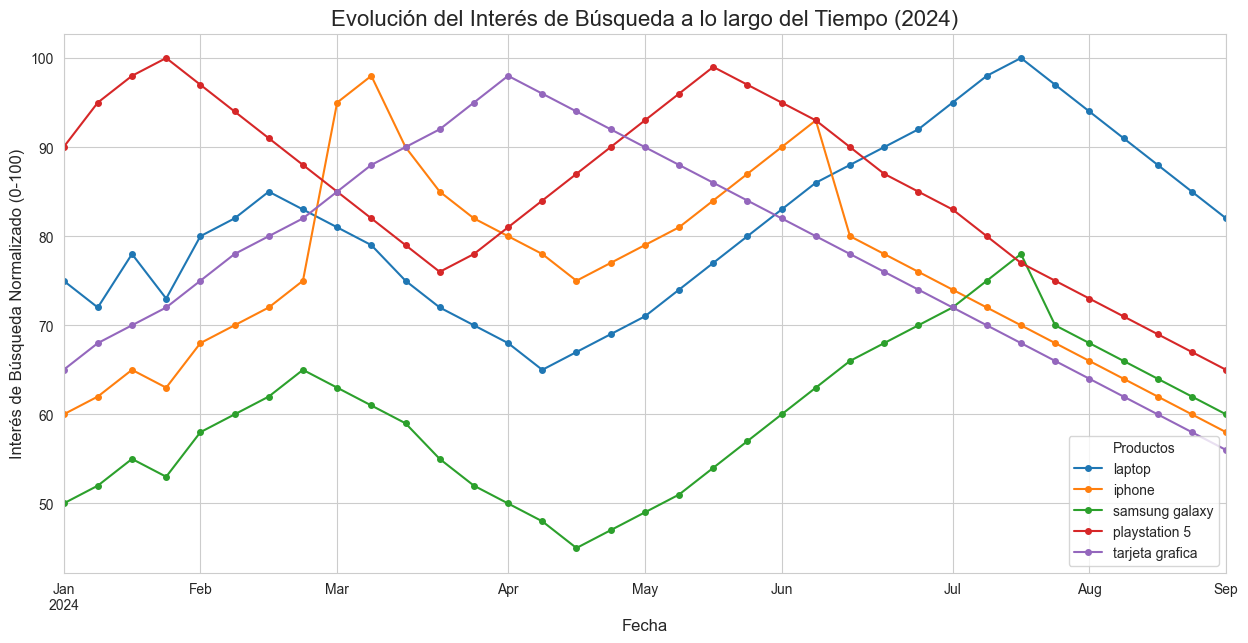

In [8]:
# ----- GRAFICO DE TENDENCIAS TEMPORALES -----
# Visualizamos cómo ha cambiado el interés de cada producto a lo largo del tiempo.

df_tendencias.plot(kind='line', style='-o', ms=4)
plt.title('Evolución del Interés de Búsqueda a lo largo del Tiempo (2024)', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Interés de Búsqueda Normalizado (0-100)', fontsize=12)
plt.legend(title='Productos')
plt.show()